**NB**: Remember to set the `PYTHONPATH` environment variable to `$DISPATCH_DIR/utilities/python`, where `$DISPATCH_DIR` is the location of your DISPATCH repository.

This notebook assumes you have already compiled DISPATCH for the 1-D MHD shock experiment (`make`) and run the code (`./dispatch.x`) successfully.
The data can be found in the `data` directory.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import dispatch
import dispatch.select
import itertools

plt.interactive(True)
plt.rcParams['figure.figsize'] = (4.5, 4)

First, read a snapshot.

In [24]:
snap = dispatch.snapshot(iout=16,run='input-chia-jung')
print "no. patches:",len(snap.patches)
p0 = snap.patches[0]
print p0.id,p0.position,p0.time,p0.gn,p0.size,p0.box

no. patches: 512
1 [0.0625 0.0625 0.0625] 0.048 [28 28 28] [0.125 0.125 0.125] [1. 1. 1.]


Printed from left to right are the patch ID, the centre of the patch in Cartesian coordinates, the time of the patch in the current snapshot, the dimensions of the density array/patch, the size of the patch, and the computational domain/box size.

In [41]:
fig = plt.figure() # create figure instance
fig.clf() # clear existing figure

<Figure size 288x288 with 0 Axes>

In [18]:
print p0.idx.vars

 {0: 'd', 1: 'px', 2: 'py', 3: 'pz', 4: 'e'}


Here are the MHD variables stored in this patch and their associated index in the data. `px` is the x-component of momentum, etc. Note that, since this particular experiment/set up is hydro only, there are no magnetic fields!

You don't have to remember these indices because you can always retrieve them using aliases, e.g., `patch.idx.d`.

-0.0078125 0.1328125 0.0546875


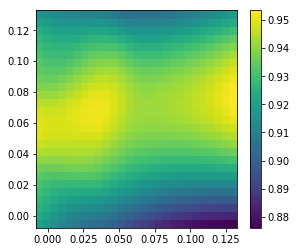

In [46]:
kmid = p0.n[2]/2 # choose index through middle of the box
print p0.z.min(), p0.z.max(), p0.z[kmid]
plt.pcolor(p0.x,p0.y,p0.var(p0.idx.d)[:,:,kmid])
plt.colorbar()

Here's a slice through through the centre of one single patch.

If you want to plot all patches for a given slice, first select all patches through the desired slice:

In [55]:
rho = dispatch.select.unigrid_plane(snap,iv=p0.idx.d,position=[0.5,0.5,0.5],dir=2)

This method routines a single `numpy` array by concatenating all of the patches at the given slice.
Note that we explicitly requested the density.

In this case, we sliced through the middle of the box.
Now, let's plot the result.

0.7370508909225464 4.982316970825195


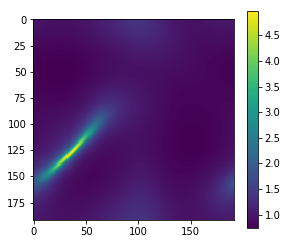

In [59]:
plt.imshow(rho)
plt.colorbar()
print rho.min(),rho.max()

Tada!